In [1]:
import networkx as nx
import utils as u
from tqdm.notebook import tqdm
from collections import Counter
from itertools import chain
from typing import List, Tuple
import matplotlib.pyplot as plt

mpl_params = {

    'figure.figsize': (25, 13),
}
plt.rcParams.update(mpl_params)

G = u.load_graph()

In [2]:
def calc_trivial_paths(orders_to_calc: List[Tuple[int, int]]):
    _paths = [nx.shortest_path(G, x[0], x[1], 'dist') for x in orders_to_calc]
    _used_edges = list(chain(*[u.edges_from_path(x) for x in _paths]))
    _used_edges_payload = Counter(_used_edges)
    return orders_to_calc, _paths, _used_edges_payload

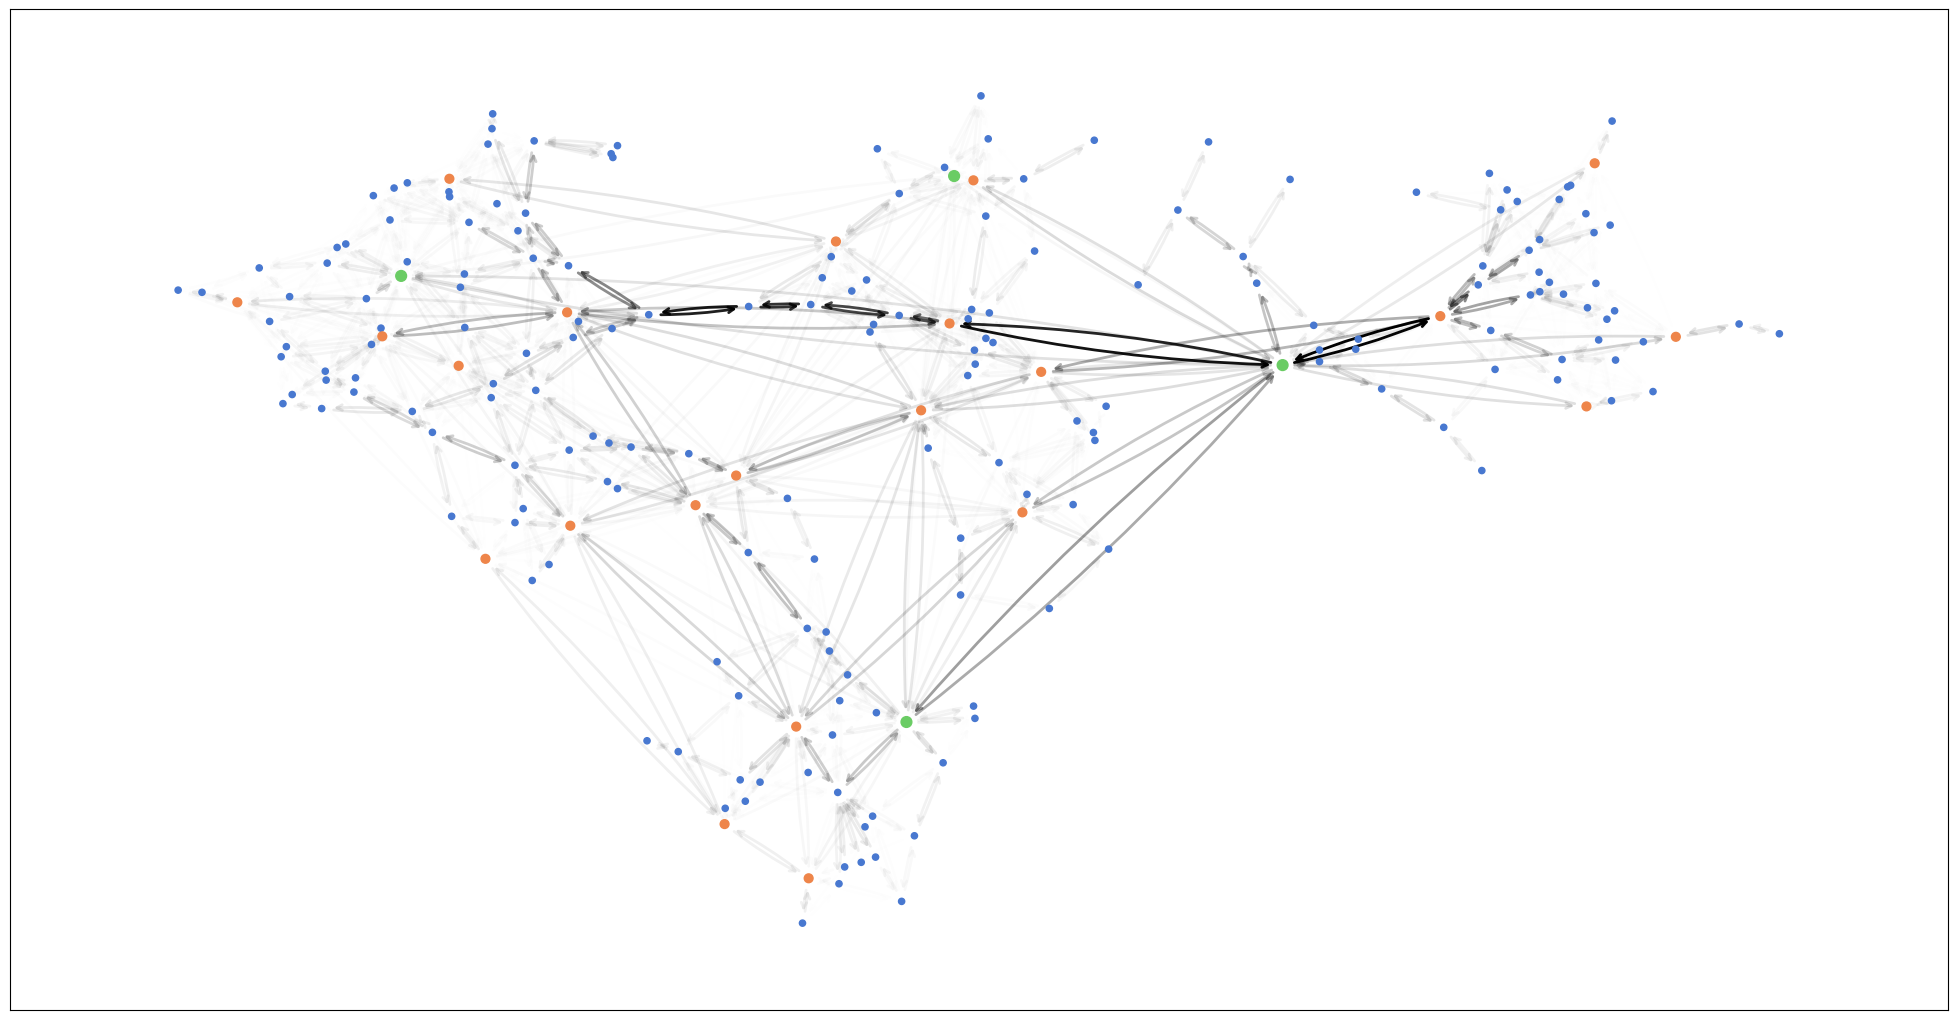

In [3]:
_, _, edges_payload = calc_trivial_paths(u.generate_orders(G, 10000))
u.draw_payload(G, edges_payload)

In [17]:
edges_prices, total_price =  u.calc_total_price(G, edges_payload)
total_price

15337.152854875687

In [5]:
orders_groups = []
for count in tqdm(range(5000, 100001, 5000)):
    orders_groups.append(u.generate_orders(G, count))
list(map(len, orders_groups))

  0%|          | 0/20 [00:00<?, ?it/s]

[5000,
 10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 45000,
 50000,
 55000,
 60000,
 65000,
 70000,
 75000,
 80000,
 85000,
 90000,
 95000,
 100000]

In [6]:
import time

results = []
for orders in tqdm(orders_groups):
    t0 = time.time()
    _, paths, edges_payload = calc_trivial_paths(orders)
    edges_prices, total_price =  u.calc_total_price(G, edges_payload)
    results.append(u.Result(orders, paths, edges_payload, edges_prices, total_price, time.time() - t0))

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
import pickle

f = open('results/trivial.pkl', 'wb')
pickle.dump(results, f)
f.close()

In [11]:
f = open('results/trivial.pkl', 'rb')
results = pickle.load(f)
f.close()

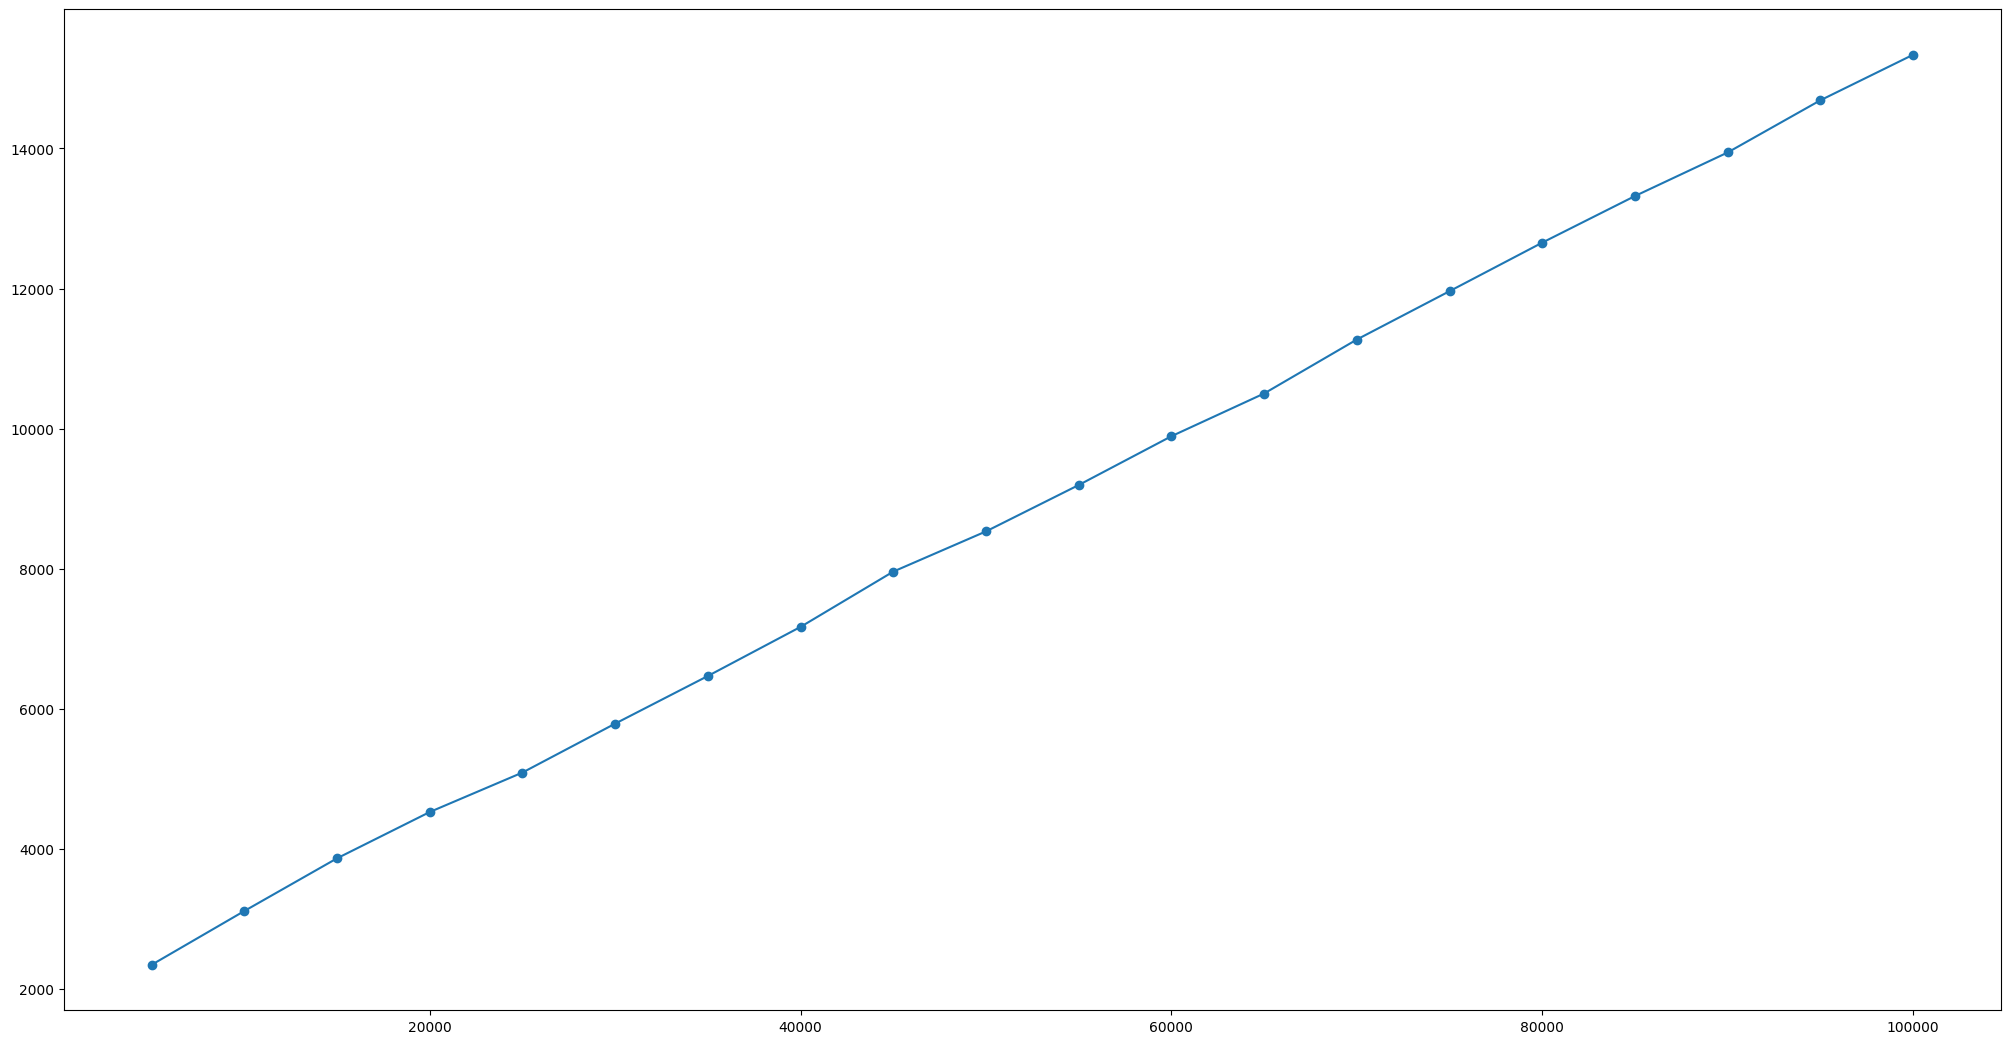

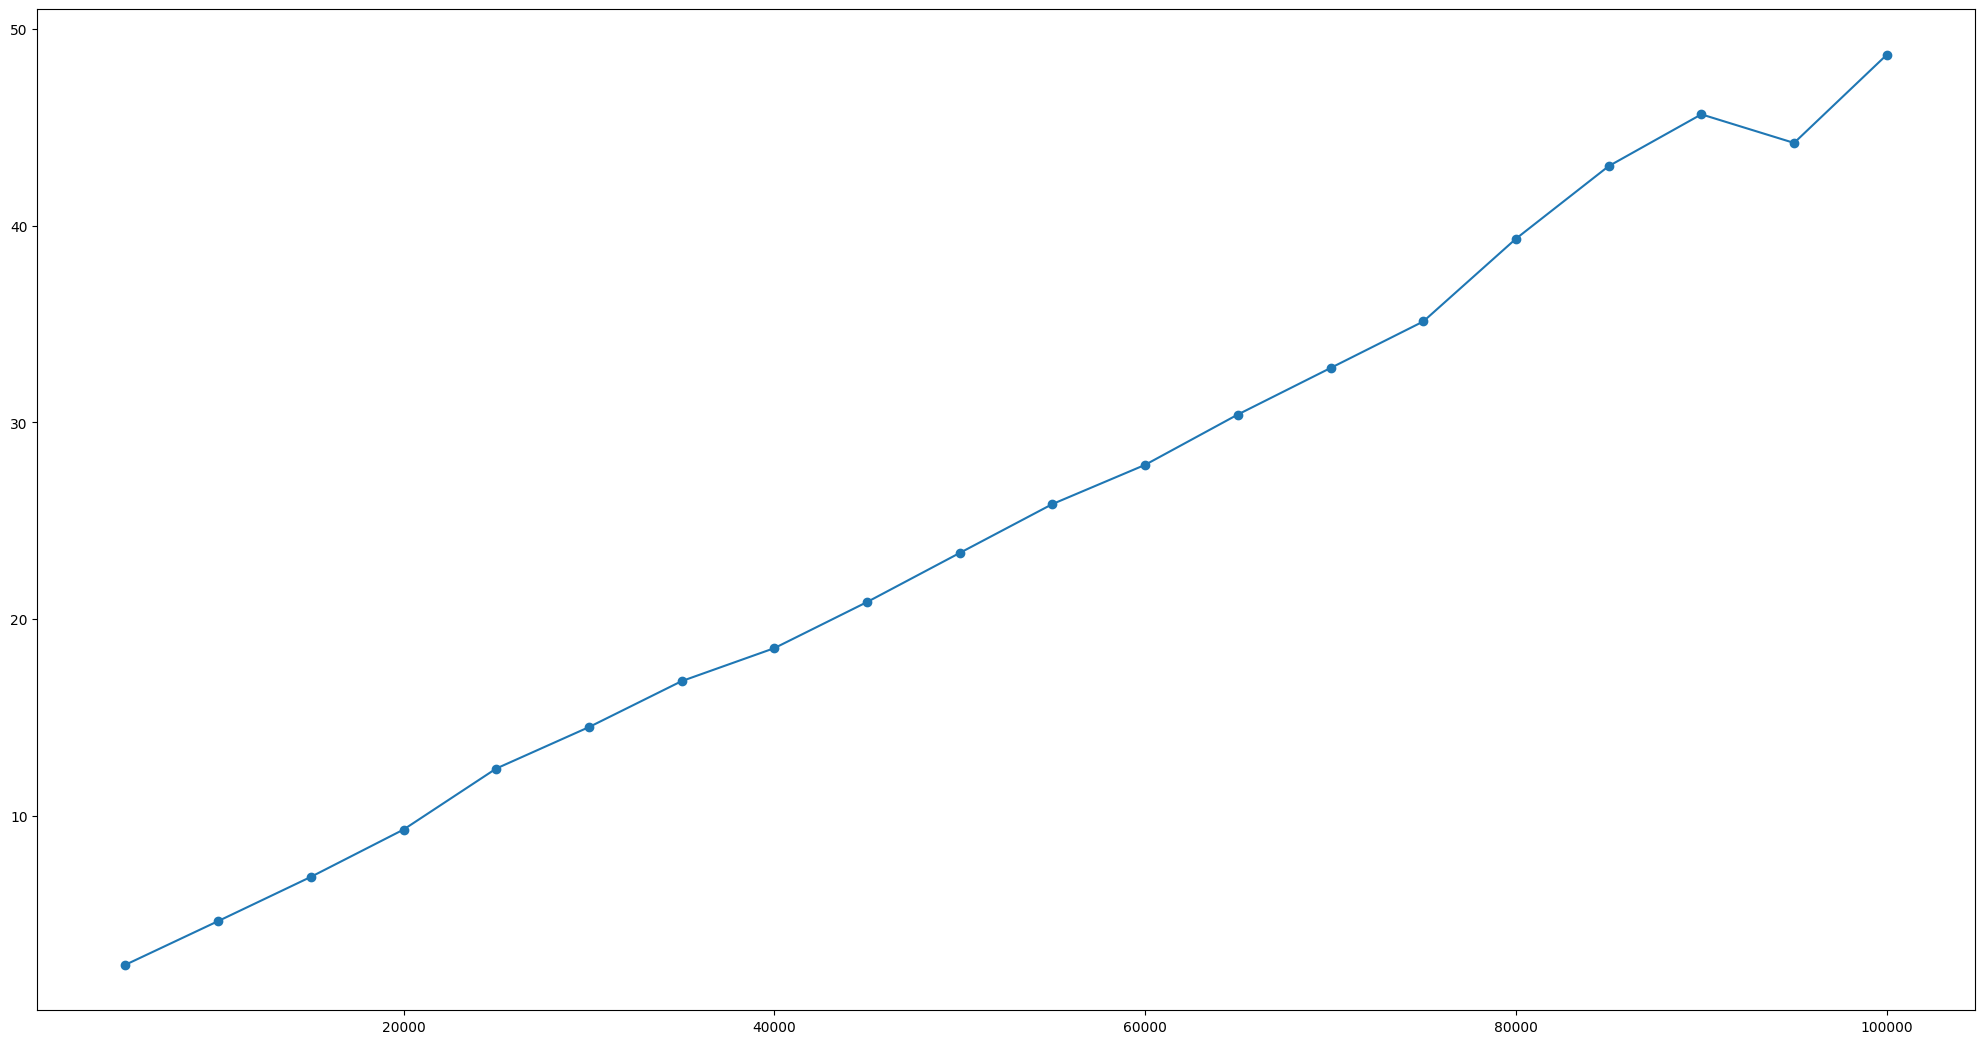

In [16]:
prices = []
times = []
orders_count = []
for result in results:
    prices.append(result.total_price)
    times.append(result.time)
    orders_count.append(len(result.orders))

plt.figure(1)
plt.plot(orders_count, prices)
plt.scatter(orders_count, prices)
plt.figure(2)
plt.plot(orders_count, times)
plt.scatter(orders_count, times)